# intel-image-classification

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="intel-image-classification")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kaustubh242002/intel-image-classification


'https://jovian.ai/kaustubh242002/intel-image-classification'

## Loading dataset
Installing and importing opendatasets for downloading the dataset for intel image classification from kaggle

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
od.download('https://www.kaggle.com/puneet6060/intel-image-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaustubhlande
Your Kaggle Key: ··········


100%|██████████| 346M/346M [00:02<00:00, 146MB/s]


In [9]:
#importing the pytorch and matplotlib libraries
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

To check the datasets in from the data directory and ./ means current path
Also we will check the labels of images from the training dataset

In [10]:
data_directory = './intel-image-classification'
os.listdir(data_directory)

['seg_train', 'seg_pred', 'seg_test']

In [11]:
classes = os.listdir("./intel-image-classification" + "/seg_train/seg_train")
classes

['mountain', 'sea', 'buildings', 'street', 'glacier', 'forest']

We have fond that there are 6 types of images in the dataset

Now we will find the total images in each label in training dataset and plot the graph

In [14]:
l= 0
c=[]#counting the no. of images in each label from the training dataset
for label in classes:
    no_of_labels = len(os.listdir(data_directory + '/seg_train/seg_train/' + label))
    c.append(no_of_labels)
    l += no_of_labels
    print(label +" has "+str(no_of_labels)+ " images in it" )

mountain has 2512 images in it
sea has 2274 images in it
buildings has 2191 images in it
street has 2382 images in it
glacier has 2404 images in it
forest has 2271 images in it


Plotting the bar graph for the number of images in each label

<BarContainer object of 6 artists>

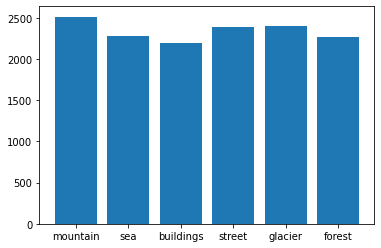

In [16]:
plt.bar(classes,c)

In [17]:
# to get the no. of images in training set
print(l)

14034


In [18]:
os.listdir(data_directory + '/seg_pred/seg_pred')

['22693.jpg',
 '8785.jpg',
 '10410.jpg',
 '1780.jpg',
 '9111.jpg',
 '10212.jpg',
 '7957.jpg',
 '19726.jpg',
 '17367.jpg',
 '3550.jpg',
 '5187.jpg',
 '22348.jpg',
 '5903.jpg',
 '9538.jpg',
 '8052.jpg',
 '20284.jpg',
 '21752.jpg',
 '18013.jpg',
 '13900.jpg',
 '21070.jpg',
 '15193.jpg',
 '7631.jpg',
 '20661.jpg',
 '3778.jpg',
 '2825.jpg',
 '11900.jpg',
 '11666.jpg',
 '3522.jpg',
 '2682.jpg',
 '12124.jpg',
 '11285.jpg',
 '16986.jpg',
 '21346.jpg',
 '7905.jpg',
 '3720.jpg',
 '21606.jpg',
 '19906.jpg',
 '5361.jpg',
 '7177.jpg',
 '22363.jpg',
 '11145.jpg',
 '7753.jpg',
 '7082.jpg',
 '22010.jpg',
 '24157.jpg',
 '16230.jpg',
 '22466.jpg',
 '5254.jpg',
 '10698.jpg',
 '935.jpg',
 '6822.jpg',
 '10652.jpg',
 '16637.jpg',
 '8941.jpg',
 '6134.jpg',
 '4609.jpg',
 '17669.jpg',
 '8416.jpg',
 '17728.jpg',
 '11802.jpg',
 '19470.jpg',
 '19111.jpg',
 '8265.jpg',
 '21312.jpg',
 '19174.jpg',
 '7376.jpg',
 '20700.jpg',
 '18054.jpg',
 '11904.jpg',
 '7156.jpg',
 '16822.jpg',
 '689.jpg',
 '23340.jpg',
 '22392.jpg

In [19]:
os.listdir(data_directory + '/seg_test/seg_test')

['mountain', 'sea', 'buildings', 'street', 'glacier', 'forest']

As we have seen that prediction dataset does not have classes but test dataset have so we will use the test set as validationn set

##Exploring the data

We will now make pytorch training dataset and see some images

In [20]:
training_data = ImageFolder(data_directory + '/seg_train/seg_train', transform = tt.ToTensor())

Now we will be plotting some images and their label and their size

buildings


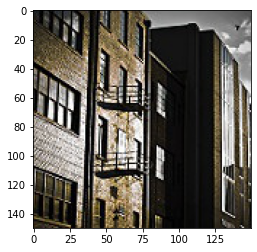

In [32]:
ASimage,label =training_data[100]
print(training_data.classes[label])
plt.imshow(image.permute(1, 2, 0))


label= buildings size= torch.Size([3, 150, 150])


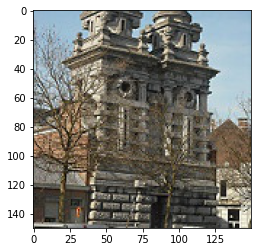

In [37]:
image,label =training_data[1000]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= sea size= torch.Size([3, 150, 150])


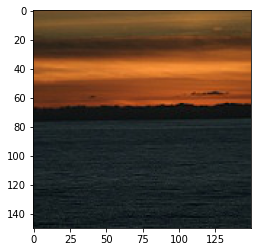

In [44]:
image,label =training_data[9421]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= buildings size= torch.Size([3, 150, 150])


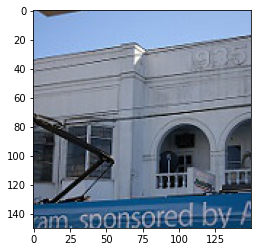

In [43]:
image,label =training_data[1254]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= mountain size= torch.Size([3, 150, 150])


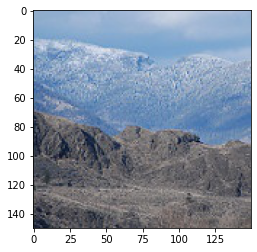

In [42]:
image,label =training_data[7890]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= forest size= torch.Size([3, 150, 150])


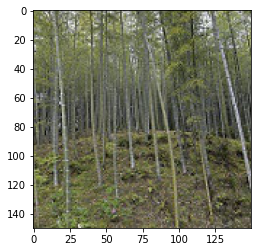

In [45]:
image,label =training_data[3106]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= glacier size= torch.Size([3, 150, 150])


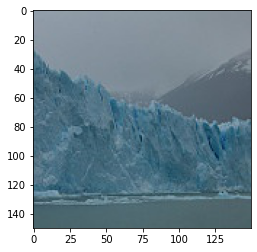

In [46]:
image,label =training_data[5184]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

label= buildings size= torch.Size([3, 150, 150])


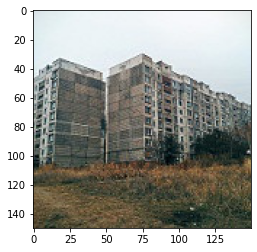

In [47]:
image,label =training_data[478]
print("label=",training_data.classes[label],"size=",image.shape)
plt.imshow(image.permute(1, 2, 0))

AS we have plotted some image we can see that the usual size of the images in the dataset is [3,150,150]

In [54]:
# to check if the dataset contains any images of different size  other than [3,150,150]
c=0
for image,_ in training_data:
    if image.shape != torch.Size([3, 150, 150]):
      print(image.shape)
      ++c
      if(c>10):
        break

torch.Size([3, 124, 150])
torch.Size([3, 113, 150])
torch.Size([3, 108, 150])
torch.Size([3, 133, 150])
torch.Size([3, 115, 150])
torch.Size([3, 135, 150])
torch.Size([3, 136, 150])
torch.Size([3, 108, 150])
torch.Size([3, 113, 150])
torch.Size([3, 110, 150])
torch.Size([3, 105, 150])
torch.Size([3, 111, 150])
torch.Size([3, 120, 150])
torch.Size([3, 149, 150])
torch.Size([3, 143, 150])
torch.Size([3, 146, 150])
torch.Size([3, 134, 150])
torch.Size([3, 142, 150])
torch.Size([3, 123, 150])
torch.Size([3, 119, 150])
torch.Size([3, 102, 150])
torch.Size([3, 76, 150])
torch.Size([3, 97, 150])
torch.Size([3, 111, 150])
torch.Size([3, 111, 150])
torch.Size([3, 135, 150])
torch.Size([3, 134, 150])
torch.Size([3, 135, 150])
torch.Size([3, 123, 150])
torch.Size([3, 113, 150])
torch.Size([3, 142, 150])
torch.Size([3, 144, 150])
torch.Size([3, 103, 150])
torch.Size([3, 136, 150])
torch.Size([3, 144, 150])
torch.Size([3, 100, 150])
torch.Size([3, 143, 150])
torch.Size([3, 141, 150])
torch.Size([3,

As we have seen that the dataset also contains the images which are of different sizes that [3,150,150] 

In [52]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kaustubh242002/intel-image-classification


'https://jovian.ai/kaustubh242002/intel-image-classification'

##Preparing the data

In [60]:
#Data agumenetaion and normalization of data
## here we will resize the data so we can get the uniform size of the data when loading the data into the model
stats = ((0.4300, 0.4571, 0.4533), (0.2581, 0.2563, 0.2886))  
#this is used for standarization of the data of each channel where 1st tuple are means and the 2nd tuple is variance
train_tt = tt.Compose([tt.Resize((150, 150)), 
                       tt.RandomHorizontalFlip(), ## this is used to flip the data so our model can genealize more 
                       tt.ToTensor(),
                       tt.Normalize(*stats, inplace = True)
])

valid_tt = tt.Compose([tt.Resize((150, 150)), tt.ToTensor(), tt.Normalize(*stats)])

In [61]:
train_ds = ImageFolder(data_directory + '/seg_train/seg_train', transform = train_tt) ##to create training dataset
valid_ds = ImageFolder(data_directory + '/seg_test/seg_test', transform = valid_tt)  ## to create validation dataset from the test directory

we are creating the batch size because we need to load the data to our model by batch wise this is because if we load full data at once it will take a lot time for the output and if too much data is loaded at once it will consume all  the memory of GPU or CPU(the device which are using)

In [62]:
batch_size=120 #to create the batch size
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True) #creating the training dataloader from torch.utils.data
val_dl = DataLoader(valid_ds, batch_size*2, num_workers = 4, pin_memory = True) #creating the validation dataloader from torch.utils.data

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


As we are shuffle as true so that we get random images every time the dataloader is called because the randomization helps the model to generalize properly with training data so that we can get better accuracy 

As we have made training dataloader we can see some batches of images in the form of grid 
To display the images, we'll need to denormalize the pixels values to bring them back into original form

In [63]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


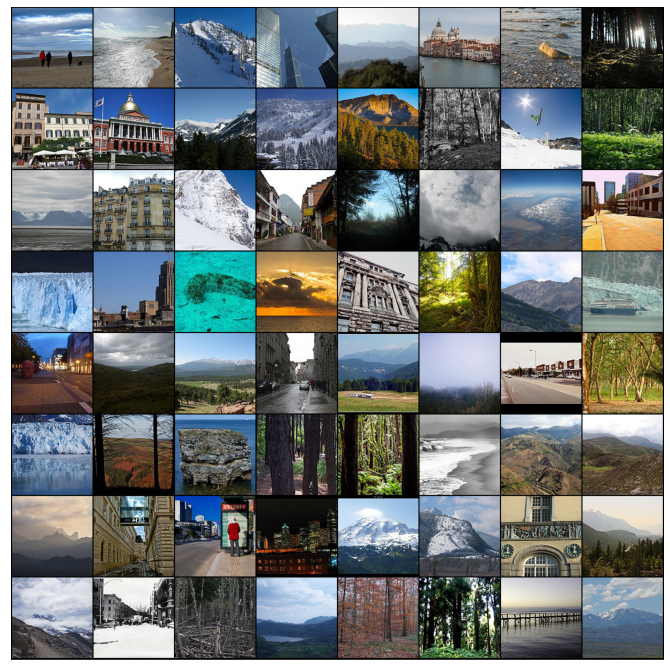

In [64]:
show_batch(train_dl)

as thus we have used above make grid function to see images

## USING GPU 
We will make some fuction(get_default_device & to_device) so that we can use gpu if our device uses gpu else it will take default CPU
We will use a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [65]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')  ##if gpu is available
    else:
        return torch.device('cpu')   ## if gpu is not available cpu will be our  default device
    
def to_device(data, device):##Move tensors to the device which we have chosen using get_defaut device function
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):  ## to wrap dataloader to move data to our device
        self.dl = dl
        self.device = device
        
    def __iter__(self):## this function yeild a batch of data after moving it to device
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):## this function tells the number of batches
        return len(self.dl)

In [66]:
device = get_default_device()
device

device(type='cuda')

As thus we have got or default device as GPU 

In [67]:
train_dl = DeviceDataLoader(train_dl, device)  ##to move the training dataloader to GPU
val_dl = DeviceDataLoader(val_dl, device)  ##to move the validation dataloader to GPU

## Model with CNN and Residual Blocks
Our model will be created with convolutional neural network and residual neural network.

In [70]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)         # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()    # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

We will make our model with 17 layers which consists of 8 convolutional neural network ,4 residual neural network(which consists of 2 convolutional network each) and one linear neural network

In [79]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1), ## it is for convolutional layer
              nn.BatchNorm2d(out_channels), 
              # BatchNorm2d will normalize the ouputs from the Conv2d layer to make sure gradients and losses are not affected disproportionally
              nn.ReLU(inplace = True)]  ## activation function to make non linear relation between input and output
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 40) 
        self.conv2 = conv_block(40, 80, pool = True) 
        self.res1 = nn.Sequential(conv_block(80, 80), conv_block(80, 80)) # 80 x 75 x 75

        self.conv3 = conv_block(80,120, pool = True) 
        self.conv4 = conv_block(120,160 ,pool = True) 
        self.res2 = nn.Sequential(conv_block(160, 160), conv_block(160, 160)) # 160 x 18 x 18

        self.conv5 = conv_block(160, 240, pool = True) 
        self.conv6 = conv_block(240, 320, pool = False) 
        self.res3 = nn.Sequential(conv_block(320, 320), conv_block(320, 320)) # 320 x 9 x 9

        self.conv7 = conv_block(320, 360, pool = True) 
        self.conv8 = conv_block(360, 400, pool = False) 
        self.res4 = nn.Sequential(conv_block(400, 400), conv_block(400,400)) #400 x 4 x 4 


        self.classifier = nn.Sequential(nn.MaxPool2d(4), # 400 x 1 x 1
                                        nn.Flatten(),    # 400
                                        nn.Dropout(0.18), 
                                        nn.Linear(400, num_classes))
    
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out 
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out 
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out 
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.res4(out) + out 
        out = self.classifier(out)
        return out

In [80]:
model = to_device(ResNet(3, 6), device)  ## the output will consist of 6 channel we are moving model to our operating device
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )

In [81]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()   ##to make the model to be in evaluating mode
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

#we will usefit_one_cycle that has learning rate scheduling in torch.optim.lr_scheduler.OneCycleLR, weight decay in weight_decay, and gradient clipping in nn.utils.clip_grad_value_
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()  ##to delete the non used tensors in our gpu because they may take up space
    history = []
    #We will use weight decay to prevent weights from becoming too large by adding a multiplier to the loss function
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)  ##  to set up custom optimizer with weight decay
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # we will use Gradient clipping limits the values of gradients (usually to small range) to prevent undesirable changes in parameters due to large gradient values.
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [82]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.19903847575187683, 'val_loss': 1.790490984916687}]

In [83]:
epochs = 9  
max_lr = 0.01  ##maximum learning rate
grad_clip = 0.1 ## maximum value of gradient 0.1
weight_decay = 1e-4
#we will use adam optimizer because it utilizes techniques like momentum and adaptive learning rates for faster training training compared to the SGD optimizer.
opt_func = torch.optim.Adam 

In [87]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,  
                         grad_clip=grad_clip, weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00327, train_loss: 0.8578, val_loss: 10.2236, val_acc: 0.4343
Epoch [1], last_lr: 0.00848, train_loss: 0.6637, val_loss: 1.9805, val_acc: 0.6276
Epoch [2], last_lr: 0.00994, train_loss: 0.5660, val_loss: 0.5214, val_acc: 0.8083
Epoch [3], last_lr: 0.00899, train_loss: 0.4733, val_loss: 0.5629, val_acc: 0.8077
Epoch [4], last_lr: 0.00706, train_loss: 0.4182, val_loss: 0.4133, val_acc: 0.8622
Epoch [5], last_lr: 0.00463, train_loss: 0.3422, val_loss: 0.3977, val_acc: 0.8612
Epoch [6], last_lr: 0.00229, train_loss: 0.2976, val_loss: 0.3372, val_acc: 0.8814
Epoch [7], last_lr: 0.00061, train_loss: 0.2377, val_loss: 0.2773, val_acc: 0.9042
Epoch [8], last_lr: 0.00000, train_loss: 0.2034, val_loss: 0.2800, val_acc: 0.9080
CPU times: user 6min 33s, sys: 6min 46s, total: 13min 19s
Wall time: 14min 20s


In [88]:
%%time
history += fit_one_cycle(2,1e-3, model, train_dl, val_dl,  
                         grad_clip=grad_clip, weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00081, train_loss: 0.2513, val_loss: 0.3398, val_acc: 0.8814
Epoch [1], last_lr: 0.00000, train_loss: 0.2234, val_loss: 0.2788, val_acc: 0.9061
CPU times: user 1min 27s, sys: 1min 31s, total: 2min 58s
Wall time: 3min 6s


In [89]:
%%time
history += fit_one_cycle(3,1e-4, model, train_dl, val_dl,  
                         grad_clip=grad_clip, weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00010, train_loss: 0.1888, val_loss: 0.2769, val_acc: 0.9077
Epoch [1], last_lr: 0.00005, train_loss: 0.1784, val_loss: 0.2706, val_acc: 0.9112
Epoch [2], last_lr: 0.00000, train_loss: 0.1650, val_loss: 0.2759, val_acc: 0.9083
CPU times: user 2min 12s, sys: 2min 15s, total: 4min 27s
Wall time: 4min 42s


Thus we get the final accuracy of 0.9083 from the model

In [130]:
## by combining all train time
train_time='22:08'

##plotting the graphs 

In [111]:
def plot_accuracies(history):  ## to get the graph of accuraies against epochs
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

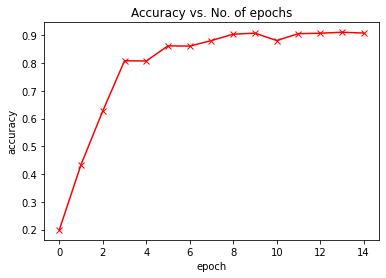

In [112]:
plot_accuracies(history)

As the graph initially at a very faster rate but then seems be constant at 0.90 and thus we get the accuracy of 0.9083

In [113]:
def plot_losses(history):  ## to get the graph of of training loss and validation loss against epochs
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

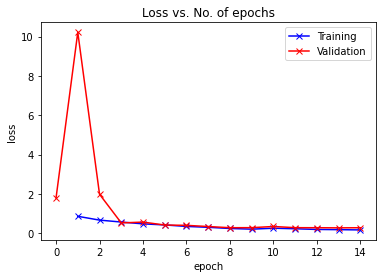

In [114]:
plot_losses(history)

from the graph it is clear that the model is at the verge of overfitting as training and validation loss are almost same and validation loss is flatteed

In [115]:
def plot_lrs(history):## to get graph of learning rate against batches
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.')

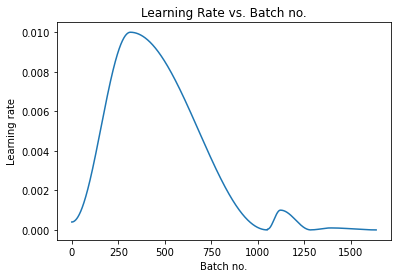

In [116]:
plot_lrs(history)

The above graph is for learning rate to see how our learning rate cahnges with batch no.

## Testing with Some images

In [117]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device) #converting to batch of 1
    yb = model(xb)#getting prediction
    _, preds  = torch.max(yb, dim=1) ## Picking index with highest probability
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: buildings , Predicted: buildings


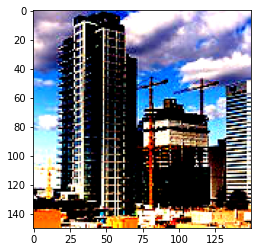

In [118]:
img, label = valid_ds[18]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: mountain , Predicted: mountain


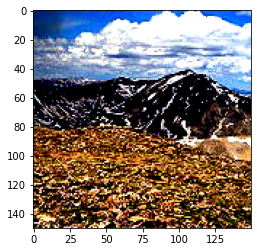

In [119]:
img, label = valid_ds[1846]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: buildings , Predicted: buildings


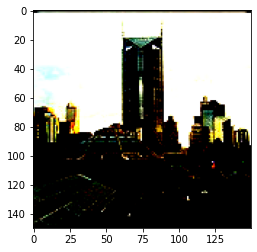

In [120]:
img, label = valid_ds[143]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: sea , Predicted: sea


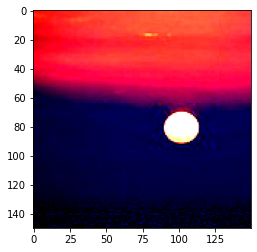

In [121]:
img, label = valid_ds[2311]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: mountain , Predicted: mountain


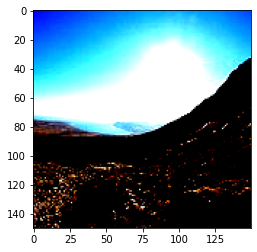

In [122]:
img, label = valid_ds[1638]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: street , Predicted: street


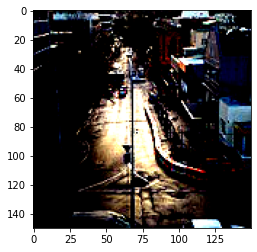

In [123]:
img, label = valid_ds[2590]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: sea , Predicted: sea


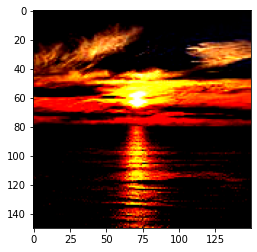

In [124]:
img, label = valid_ds[2096]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

## Saving the model
We will save weights of the model and record the hyperparameters

In [134]:
torch.save(model.state_dict(), 'intel-image-classification.pth')

In [135]:
jovian.reset()
jovian.log_hyperparams(arch='resnet17', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [136]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)


[jovian] Metrics logged.


In [ ]:
jovian.commit(project = 'intel-image-classification', 
              environment = None, 
              ouputs = ['intel-image-classification.pth'])


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


In [139]:
jovian.commit(project = 'intel-image-classification', 
              environment = None, 
              ouputs = ['intel-image-classification.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/kaustubh242002/intel-image-classification


'https://jovian.ai/kaustubh242002/intel-image-classification'